# How to code a quantum computer

In [1]:
import numpy as np
from qiskit import *
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor

%matplotlib inline

# Qubits

A bit is the building block of all classical computation. It can be represented by any system that has two possible states, such as whether a voltage is passing through a transistor or not, or whether there is milk in the fridge or not. Typically it's easier to work with transistors. If there is no voltage passing through the transistor we call this the 0 state. If there is some voltage passing through we call this the 1 state.

A **qubit** is the building block of all **quantum** computation. It can be represented by any **quantum** system that has two possible states. Because quantum mechanics is the physics that describes small things, typically qubits are built from small things like atoms. When that atom is sitting around doing nothing, we can call this the $|0\rangle$ state. If we shine a laser at the atom, it absorbs some of this light and goes into a higher energy state. We can call this the $|1\rangle$ state.

# Quantum logic gates

All quantum calculations are done by applying gates to qubits. One example is the $\hat{X}$ gate, which flips the state of the qubit. So if we apply the $\hat{X}$ gate to the $|0\rangle$ state, our qubit will be left in the $|1\rangle$ state. Similarly, if we apply the $\hat{X}$ gate to the $|1\rangle$ state, our qubit will be left in the $|0\rangle$ state. Mathematically we write this as:

$$\hat{X}|0\rangle = |1\rangle$$
$$\hat{X}|1\rangle = |0\rangle$$

# Quantum circuits 

Quantum circuits are the visual representation of any quantum algorithm. They contain classical bits, qubits, and logic gates. Ultimately, all of quantum computing involves writing code to create quantum circuits. With that in mind, lets make one!

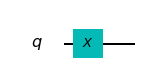

In [7]:
# Create a quantum circuit with 1 qubit. By default it is created in the |0> state.
qc = QuantumCircuit(1)

# Apply a X gate to qubit 0
qc.x(0)

# See what the circuit looks like
qc.draw(output='mpl')

This circuit implements exactly the equation $\hat{X}|0\rangle = |1\rangle$. If we were to measure the qubit (which we will do later), the result would be the $|1\rangle$ state.

## Task 1

* Create a circuit with two qubits.
* Apply a X gate to both of the qubits.
* What would be the output state? Hint: for two qubits, we write the initial state as $|00\rangle$.

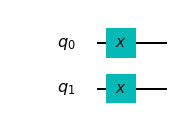

In [3]:
# Create a quantum circuit with 2 qubits. By default it is created in a |00> state.
qc = QuantumCircuit(2)

# Apply a X gate to qubit 0 and qubit 1.


# See what the circuit looks like
qc.draw(output='mpl')

## Task 2

* Create a circuit with five qubits.
* Apply two X gates to the first qubit
* Apply one X gate to all the other qubits
* What would be the output state?

In [43]:
# Create a quantum circuit with 5 qubits. By default it is created in a |00000> state.


# Apply the gates


# See what the circuit looks like


# Superposition

So far we have shown that qubits have two states, just like classical bits. This means that in theory, quantum computers can do everything a classical computer can do! However, qubits have an extra trick up their sleeve. They can exist in the following state:

![title](images/equal_superposition.png)


This is known as a **superposition** state, where the qubit is neither just $|0\rangle$ or $|1\rangle$! Instead, the qubit exists somewhere in between, as a combination of some part of each state.

The number in front of each state is known as the **amplitude**. When we measure a qubit, we break all of its quantum effects and observe it as either $|0\rangle$ or $|1\rangle$. The probability of observing it in the $|0\rangle$ state is given by the amplitude squared. This is why in the above example, there is a $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$ chance of observing the qubit in either the $|0\rangle$ or $|1\rangle$ state.

We can put a qubit in a superposition with **any** probability of being in each state, such as 80%-20% or 51%-49%. This, alongside complex amplitudes, won't be covered in this workshop but are important parts of quantum algorithms.

# The Hadamard gate

As it turns out, the superposition state $|\psi\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)$, with 50% probability of each state, is especially useful in quantum computing. Because of this, it has its own logic gate to create such a state known as the Hadamard gate:

$$\hat{H}|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$

Let's use this gate, and check that the state really does give $|0\rangle$ 50% of the time and $|1\rangle$ 50% of the time!

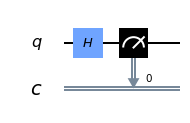

In [4]:
# Create a quantum circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(1, 1)

# Apply a H gate to qubit 0
qc.h(0)

# Make a measurement of the qubit, and record the result on a classical bit
qc.measure(0, 0)

# See what the circuit looks like
qc.draw(output='mpl')

In [5]:
# Choose what device to run our circuit on
quantum_simulator = Aer.get_backend('qasm_simulator')

# Run the circuit 1000 times
job = execute(qc, quantum_simulator, shots=1000)

# Find out how many times we measured 0 and how many times we measured 1
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'0': 519, '1': 481}


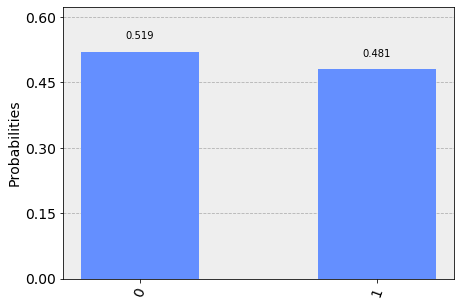

In [6]:
# Plot this on a histogram

from qiskit.visualization import plot_histogram
plot_histogram(counts)

You'll notice that we may not have actually got $|0\rangle$ and $|1\rangle$ exactly 50% of the time! This is exactly the same as flipping a coin 1000 times, due to the random nature of probability you may not get heads exactly 500 times.

## Task 3

* Create a circuit with two qubits and two classical bits.
* Apply a Hadamard gate to each qubit.
* Measure each of the qubits.

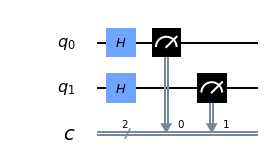

In [19]:
# Create a quantum circuit with 2 qubits and 2 classical bits.


# Apply a H gate to qubit 0 and qubit 1


# Make a measurement of the qubit 0 on classical bit 0, and qubit 1 on classical bit 1.


# See what the circuit looks like
qc.draw(output='mpl')

The question remains, what would be the final state of this circuit? First we're going to calculate this mathematically, which may be something you're interested in learning or have experience in. If not, feel free to skip to the final result.

-----
Previously we learnt that when we apply a Hadamard gate to the $|0\rangle$ state, it acts like:

$$\hat{H}|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$

If we want to write the left hand side of this equation for Task 3, it would look like:

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \quad ?$$

The subscripts $\hat{H}_{0}$ and $\hat{H}_{1}$ are just telling you that these gates are acting on qubit 0 and qubit 1 respectively. Applying the rule we know from before we get:

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \frac{1}{\sqrt{2}}\left(|0_{0}\rangle+|1_{0}\rangle\right)\frac{1}{\sqrt{2}}\left(|0_{1}\rangle+|1_{1}\rangle\right)$$

To solve this uses the same maths as multiplying out brackets. You may remember this from school - such as solving $(x+2)(x+2)$.

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \frac{1}{2}\left(|0_{0}\rangle|0_{1}\rangle + |0_{0}\rangle|1_{1}\rangle + |1_{0}\rangle|0_{1}\rangle + |1_{0}\rangle|1_{1}\rangle\right)$$

-------------
**FINAL RESULT** Often for simplicity we remove the subsripts on qubits and also squash them together into one bracket. So finally we have:

$$\hat{H}_{0}\hat{H}_{1}|00\rangle = \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle\right)$$

When we apply a Hadamard gate to two qubits, we have **4 possible outcomes for the final result**. Each one can occur with probability $\left(\frac{1}{2}\right)^2 = \frac{1}{4}$ and most interestingly, it is truly random which one we will be left with. This provides inspiration for our next challenge, but let's quickly run the circuit from before to verify our result.

In [17]:
# Run the circuit 1000 times
job = execute(qc, quantum_simulator, shots=1000)

# Find out how many times we measured 0 and how many times we measured 1
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'00': 250, '10': 277, '01': 234, '11': 239}


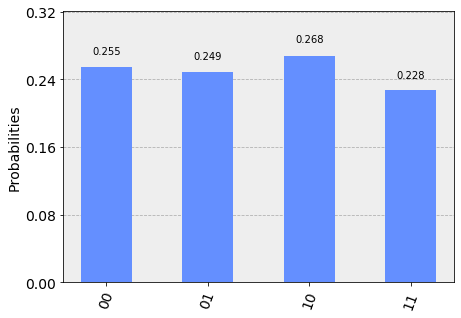

In [16]:
# Plot this on a histogram

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Excellent! If the task was completed correctly, we should see 4 possible outcomes each with roughly equal probability. 

## The quantum 8-ball

So far we have learnt that qubits can be placed into a superposition using the Hadamard gate. When we place one qubit into a superposition there are 2 possible outcomes. When we place two qubits in a superposition, there are 4 possible outcomes. If you can see the pattern, for $n$ qubits it is possible to have $2^n$ possible outcomes! This is one of the advantages that quantum algorithms leverage over classical ones!

You're going to create a quantum 8-ball, one of these things that are used to solve life's hardest problems. 

![image.png](images/8_ball.png)

Because the outcome of a quantum superposition is truly random, this will be the only truly random 8-ball in the world!

## Task 4

* Create a circuit with three qubits and three classical bits
* Apply a Hadamard gate to each qubit.
* Measure each of the qubits.

In [ ]:
# Create a quantum circuit with 3 qubits and 3 classical bits.


# Apply a H gate to each of the qubits


# Make a measurement of each qubit


# See what the circuit looks like


In [44]:
# Define a function which will give us advice based on each of the possible 8 outcomes

def answer(result):
    for key in result.keys():
        state = key
    print('The Quantum 8-ball says:')
    if state == '000':
        print('It is certain.')
    elif state == '001':
        print('Without a doubt.')
    elif state == '010':
        print('Yes - definitely.')
    elif state == '011':
        print('Most likely.')
    elif state == '100':
        print("Don't count on it.")
    elif state == '101':
        print('My reply is no.')
    elif state == '110':
        print('Very doubtful.')
    else:
        print('Concentrate and ask again.')

In [45]:
# Run the circuit 1 time
job = execute(qc, quantum_simulator, shots=1)

# Retrieve the output
result = job.result().get_counts(qc)
answer(result)

The qubits were measured in state 10
The Quantum 8-ball says:
Concentrate and ask again.


If all has gone well, you should recieve an answer back from the 8-ball when you run the above code block. Try running it several times, one after the other, and see if you get different answers.

Dissapointingly, whilst the results of your 8-ball may look random, they are not! This is because we are still running on a classical computer pretending to be quantum computer. Let's make a change to that.

## Task 5

* Get (or create) your IBMQ credentials (https://qiskit.org/documentation/install.html#install-access-ibm-q-devices-label)
* Choose a real quantum computer
* Run the 8-ball on a real quantum computer

In [6]:
# Once you have an IBMQ account, paste your API token below instead of the text which says MY_API_TOKEN
IBMQ.save_account('MY_API_TOKEN')

# Now you have a saved account, lets load it
IBMQ.load_account()

# Each account has many "providers", which can give access to different tiers of hardware.
provider = IBMQ.get_provider(group='open')

In [7]:
# Find the least busy real quantum computer
from qiskit.providers.ibmq import least_busy

quantum_computer = least_busy(provider.backends(simulator=False))

quantum_computer

<IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>

Now we have our quantum hardware, lets re-run the 8-ball

In [40]:
# Run the circuit 1 time, but this time on the real quantum computer
job = execute(qc, quantum_computer, shots=1)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Unfortunately, it is likely that you are not the only person trying to use this quantum computer at the moment, so you will have to sit in a queue. Keep an eye on the job status printed above, and when you see `Job Status: job has successfully run`, then carry on. If it's taking a while, feel free to skip ahead and come back to this later.

In [41]:
# Retrieve the output
result = job.result().get_counts(qc)
answer(result)

The Quantum 8-ball says:
Concentrate and ask again.


**Congratulations!** You just ran your first quantum algorithm on a real quantum computer.

# Entanglement 

Famously known as 'spooky action at a distance' (Einstein's attempt to discredit the whole idea of entanglement), entanglement has been used to develop quantum information theory; conjecture an origin of gravity; and even propose an arrow of time. Here we are concerned with how entanglement gives quantum computing its power. 

So what actually is entanglement? Let's entangle some qubits and come back to this question. To do this, we are going to need another gate - the C-NOT gate. 

Unlike the X and H gates, the C-NOT acts on two qubits. This is a quantum version of a classical 'If' logic gate. 

One qubit is the 'control' qubit, and the other is the 'target' qubit. 

- If the control is in the state $|0\rangle$, then the gate leaves the target qubit untouched. 

- If the control is in the state $|1\rangle$, then an X-gate is applied to the target qubit, which flips the state from $|0\rangle$ to $|1\rangle$ or vice-versa.

Let's make one! 


In [ ]:
from qiskit import *

# Create a quantum circuit with 2 qubits 
qc = QuantumCircuit(2)

# Now apply a C-NOT gate with the 0th qubit as the control, and the 1st qubit as the target
qc.cx(0, 1)

# Check what your circuit looks like! 
qc.draw(output='mpl')


Since both qubits started in the $|0\rangle$ state, what state should the qubits have ended up in? 

The control was $|0\rangle$, so it leaves the target qubit as it is - which is also $|0\rangle$! So our C-NOT gate hasn't done anything exciting, and the overall state was $|00\rangle$ before and after the gate. But not for long... 

Try modifying your circuit to add a Hadamard gate to the 0th qubit, before applying the C-NOT gate. Can you work out what state the qubits have ended up in after both gates? 

In [ ]:
# Modify the circuit to apply a Hadamard gate to the 0th qubit before applying the C-NOT gate. 

#ANSWER: 

qc = QuantumCircuit(2) 

qc.h(0)

qc.cx(0, 1)

qc.draw(output='mpl')

Let's work out what state we have produced. 

- We started with $|0\rangle|0\rangle = |00\rangle$. 

- Then we applied a Hadamard to the 0th qubit, creating $\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)|0\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |10\rangle\right)$. 

- Then we applied a C-NOT gate with the 0th qubit as the control, and the 1st as the target. 

- When the control is $|0\rangle$, the C-NOT leaves the target as it is, which is $|0\rangle$. 
- When the control is $|1\rangle$, the C-NOT applies an X-gate to the target, which changes the target from a $|0\rangle$ to a $|1\rangle$. 

- This means the state we end up with is $\frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$. 

This is known as a 'Bell state' - which is a maximally entangled state! So our simple circuit of a Hadamard and a C-NOT gate was enough to entangle two qubits. This new version of a superpositon has special properties because you can see that the results you measure for each qubit are correlated. 

If you measure the 0th qubit and find a 1, then the system must be in the $|11\rangle$ state - so the 1st qubit must be a 1 too! Similarly if you measure either of the two qubits to be 0, the other must also be in the 0 state. So the results of the two qubits are correlated, even though the states of both were undetermined before you measured them. This works however far apart the qubits are - they could be on opposite sides of the universe, and the instant you measure one, you know the state of the other. This is why Einstein called it 'spooky action at a distance'! 

(Physics-y aside: 

Correlations can also happen with classical information. If you seperate a pair of socks you bought from the supermarket and send one to Mars, then as soon as you look at one, you know what colour the other one is also. What makes these correlations 'quantum' is that they exist however you measure the qubits. You don't have to measure them in the z-basis of 1 or a 0. You can measure them in the x basis of + and - states and will still find these correlations exist. Measuring in a different 'basis' doesn't exist as a concept in classical information - there's only one way you can measure a bit which must be 0 or 1!) 

Now let's check that our reasoning was correct, and we really have entangled these qubits. Time to take some measurements. 

Modify the circuit you created above to add two classical bits to store our measurements, and add measurements of the two qubits after the H and C-NOT gates. 

In [ ]:
# Modify your entanglement circuit to add two classical bits to record measurements. 

#ANSWER: 

qc = QuantumCircuit(2, 2) 

qc.h(0)

qc.cx(0, 1)

qc.measure(0,0)
qc.measure(1,1)

qc.draw(output='mpl')

Now use a simulator of a quantum computer to find out the results of these measurements, as we did earlier for the superposition example. 

In [ ]:
#Use a quantum computer simulator to produce a histogram of the outputs of these measurements. 

#ANSWER:

quantum_simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, quantum_simulator, shots=1000)

results = job.result()
counts = results.get_counts(qc)

print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Just as we predicted - both qubits are always in the same state! As with measuring the superposition before, each measurement outcome has a rough 50% probability, that is not exact due to the probabilistic nature of the outcome of each measurement. 

Can you predict what will happen when we try this on a real quantum computer? Give it a go now. 

In [ ]:
# Run the circuit on one of IBM's quantum computers 

#[INSERT INSTRUCTIONS HERE]

IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_16_melbourne')

job = execute(qc, backend=qcomp)

result = job.result()

plot_histogram(result.get_counts(qc))

Congratulations - you have just programmed the entanglement of two real qubits on one of IBM's quantum computers. When you think about how crazy this phenomenon is, so much that Einstein refused to believe its existence, that's pretty amazing. 

But something on this histogram doesn't look quite right. There are some unwanted states - 01 and 10 shouldn't be possible. 

This is because IBM's quantum computers are not perfect, indicating one of the major issues with quantum computing on real devices - NOISE! We will explore the wonders of noise in the next section. 

# Noise

Current quantum computers are noisy. Some examples of noise:
* Qubits may not be albe to mantain their superposition
* Quantum gates may not do exactly what they're supposed to
* Measurements may give incorrect results (measure $|0\rangle $ as $ |1\rangle$)
The presence of these noises means that we can't always trust the result of  a quantum computer. In the following exercise, we will see the effects of noise in action.

## Quantum emojis

Anything that can be done with bits can be done with qubits. Simply leave a qubit in its initialized value for the state *0*, or use an operation with the effect of a NOT gate (such as *X* or *Y*) to rotate it to a *1*. Each qubit then becomes a bit, allowing us to implement "Hello, World!" directly on a quantum computer.

In practice, it is not so straightforward. ASCII encoding of "Hello, World!" requires over 100 bits, and therefore over 100 qubits. Current quantum devices are not yet large enough for the job.

However, two ASCII characters require only 14 (qu)bits. Writing an emoticon like ;) can therefore be done using quantum computers available today.

The string corresponding to ;) is
    
    ;)  =  '01110110101001'

where the first 7 bits '0111011' correspond to ';' and the last 7 bits '0101001' correspond to ')'.

Let's try to create a circuit that prints this emoji. 


## Task 6
* Create a circuit with 14 quantum bits and 14 classical bits
* Add X gates to appropriate qubits
* Measure each of the qubits

In [5]:
# Create a quantum circuit with 14 qubits and 14 classical bits.
qc = QuantumCircuit(14,14)

# Apply a X gate to appropriate qubits
for x in [1,2,3,5,6,8,10,13]:
    qc.x(x)

# Make a measurement of each qubit
for i in range(14):
    qc.measure(i,i)
    
    
quantum_simulator = Aer.get_backend('qasm_simulator')

# Run the circuit
job = execute(qc, quantum_simulator, shots=1)

# Retrieve and print the output
result = job.result().get_counts(qc)
bit_string = list(result)[0] # the bit string is the first (and only) key of the result dictionary

# In the output bit string, the bits are ordered from right to left 
# So, we need to reverse the output to get the desired bit string
bit_string = ''.join(reversed(bit_string))
print(bit_string)

01110110101001


To print the emoji, we need to convert the bitstring ('0011101100101001') to an ASCII character. Run the following code and ensure it prints ';)'

In [6]:
# Convert the first and second half of the bitstring(base 2) to an integer and convert that to an ASCII character
char1 = chr(int( bit_string[0:7] ,2)) 
char2 = chr(int( bit_string[7:14] ,2))
print(char1+char2)

;)


Of course, just writing a bit string in some qubits isn't very quantum. Instead we can prepare a superposition of two different emoticons. We choose ;) and 8), which correspond to the bit strings

    8)  =  '01110000101001'
    ;)  =  '01110110101001'

Note that these strings differ only on bits 6 and 7. It is therefore only these on which the superposition must be prepared. The superposition will be of the '00' of 8), and the '11' of ;) , and so will be a standard Bell state.

Let's try to create a circuit that creates this superposition. The only difference between such a circuit and our previous circuit will be the gates acting on qubits 6 and 7. 

## Task 7
* Create a circuit with 14 quantum bits and 14 classical bits
* Add X gates to appropriate qubits
* Use H and cx to create the superposition of '00' and '11'
* Measure all qubits

In [9]:
# Create a quantum circuit with 14 qubits and 14 classical bits.
qc = QuantumCircuit(14,14)

# Apply a X gate to appropriate qubits
for x in [1,2,3,8,10,13]:
    qc.x(x)

qc.h(5)
qc.cx(5,6)

# Make a measurement of each qubit
for i in range(14):
    qc.measure(i,i)
    
    
quantum_simulator = Aer.get_backend('qasm_simulator')

# Run the circuit
job = execute(qc, quantum_simulator, shots=1024)

# Retrieve and print the output
result = job.result().get_counts(qc)

for string, frequency in result.items():
    bit_string = ''.join(reversed(string))

    char1 = chr(int( bit_string[0:7] ,2)) 
    char2 = chr(int( bit_string[7:14] ,2))
    
    print(char1 + char2 + ' : ' + str(frequency/1024))


8) : 0.515625
;) : 0.484375


If all went well, ';)'  and '8)' should have been printed out along with their probabilities.

This gives us a list of characters and probabilities. But that isn't very fun. For something more visual, we use matplotlib to create an image in which the all the characters included in the result are printed on top of each other. The alpha channel (transparency) of each character is set to the fraction of shots for which that result occurred. Run the following code to see this in action.

8) : 0.515625
;) : 0.484375


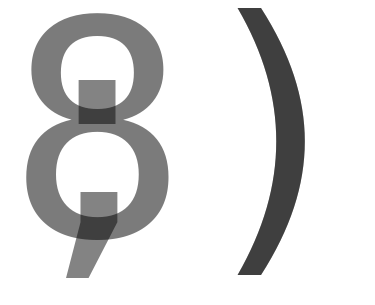

In [10]:
import matplotlib.pyplot as plt

def show_emoji_superposition(result):
    plt.rc('font', family='monospace')
    for string, frequency in result.items():
        bit_string = ''.join(reversed(string))

        char = chr(int( bit_string[0:7] ,2))
        char += chr(int( bit_string[7:14] ,2))

        prob = frequency/ 1024

        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)

        print(char + ' : ' + str(frequency/1024))

    plt.axis('off')
    plt.show()
    
show_emoji_superposition(result)

This was the result of running the circuit on a simulated quantum computer. Hence, there wasn't any noise. To see the effects of noise, let's run the same circuit on an actual quantum computer.

In [ ]:
# Get the least busy quantum computer with at least 14 qubits
quantum_computer = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 14
                                    and not x.configuration().simulator
                                    and x.status().operational==True))
# Run the circuit
job = execute(qc, quantum_computer, shots=1024)

# Retrieve and print the output
result = job.result().get_counts(qc)

# Show superposition
show_emoji_superposition(result)


The unintended emojis are present due to the noise in the quantum computer that we used.

And there you have it. A program to take one of the world's most advanced devices and made a smiley with it. A quantum smiley!

# Let's put it all together

## Quantum teleportation